# Phase 4 Project Submission

- Student name: Lucas Wilkerson
- Student pace: Flex/part time
- Scheduled project review date/time:
- Instructor name: Morgan Jones


# Pneumonia Detection and Classification

## Project Overview

For this project, the aim is to build a model for image classification that can classify whether a patient has pneumonia when provided a chest x-ray image. 


## Business Problem and Stakeholder

A healthcare physician group is looking to improve their patient outcomes, specifically patients who are being diagnosed with pneumonia. Pneumonia is a significant health concern among patients, especially geriatric and pediatric patients. For effective treatment and the best possible outcomes, early detection and diagnosis is crucial. Current methods for diagnosing pneumonia can be time-consuming and can be prone to error. Through the development and use of method such as image classification and deep learning, we may be able to improve this process which can lead to an increase in early accurate identification and as a result improve patient outcomes.




## Data Understanding

The dataset used for this project contains chest X-ray images from pediatric patients, ages one to five. The dataset is already separated and organized into three groups:

- Train: data used for training the model
- Test: data used for testing and evaluating the model's performance 
- Validation: data used during the training process to help tune the model

- 

## Data Preparation/ Preprocessing

## Data Analysis/ Data Visualization

## Modeling

## Hyperparamater Tuning 

## Model Evaluation

## Conclusion and Recommendations

## Limitations

# Building baseline neural network model

In [1]:
#Start by building a baseline neural network

# Don't for get to check distribution, check for duplicates, nans
# get statistics if needed/useful 

#importing necessary packages

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
import numpy as np
import os


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # This prevents kernel shut down due to xgboost conflict
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # This line prevents tf's comments about the optimizing your machine

In [2]:
# Directory path
train_dir = 'chest_xray/train/'
test_dir = 'chest_xray/test/'
val_dir = 'chest_xray/val/'

# Preprocess the images into tensors
# Rescale the data by 1/.255 and use binary_crossentropy loss

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Get all the data in the directory chest_xray/train (5216 images) and reshape them
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150), batch_size=5216, class_mode='binary')

# Get all the data in the directory chest_xray/test (624 images) , and reshape them
test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size=(150, 150), batch_size=624, class_mode='binary')


# Get all the data in the directory chest_xray/val (16 images), and reshape them
val_generator = val_datagen.flow_from_directory(
        val_dir, 
        target_size=(150, 150), batch_size=16, class_mode='binary')

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


### Handling Class Imbalance

# Utilizing class weights to help adjust and increase importance of underepresented class
# Will pass class_weight=class_weights_dict to the fit function

class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights_dict = dict(enumerate(class_weights))

## Inspect and Prepare Data

### Viewing some images from the datasets 

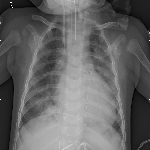

In [3]:
# Datasets are now six numpy arrays 

# Viewing image from train group

array_to_img(train_images[10])

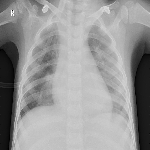

In [4]:
array_to_img(train_images[130])

In [5]:
sample_image = train_images[0]
sample_image

array([[[0.16862746, 0.16862746, 0.16862746],
        [0.16862746, 0.16862746, 0.16862746],
        [0.18039216, 0.18039216, 0.18039216],
        ...,
        [0.21568629, 0.21568629, 0.21568629],
        [0.30588236, 0.30588236, 0.30588236],
        [0.42352945, 0.42352945, 0.42352945]],

       [[0.16862746, 0.16862746, 0.16862746],
        [0.16862746, 0.16862746, 0.16862746],
        [0.17254902, 0.17254902, 0.17254902],
        ...,
        [0.21960786, 0.21960786, 0.21960786],
        [0.3137255 , 0.3137255 , 0.3137255 ],
        [0.4784314 , 0.4784314 , 0.4784314 ]],

       [[0.16078432, 0.16078432, 0.16078432],
        [0.17254902, 0.17254902, 0.17254902],
        [0.18039216, 0.18039216, 0.18039216],
        ...,
        [0.2392157 , 0.2392157 , 0.2392157 ],
        [0.32941177, 0.32941177, 0.32941177],
        [0.4901961 , 0.4901961 , 0.4901961 ]],

       ...,

       [[0.09803922, 0.09803922, 0.09803922],
        [0.08235294, 0.08235294, 0.08235294],
        [0.0509804 , 0

In [7]:
# Previewing sample label
sample_label = train_labels[0]
sample_label

1.0

In [8]:
# Get value counts
unique_elements, counts = np.unique(train_labels, return_counts=True)

# Combine the unique elements and their counts into a dictionary and 
value_counts_dict = dict(zip(unique_elements, counts))
print(value_counts_dict)

{0.0: 1341, 1.0: 3875}


Training set contains 1341 individuals classfied as normal and 3875 individuals classified with pneumonia

In [9]:
# Previewing shape of each dataset

print("Image Dataset Shape")
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

print("Label Dataset Shape")
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)



Image Dataset Shape
(5216, 150, 150, 3)
(624, 150, 150, 3)
(16, 150, 150, 3)
Label Dataset Shape
(5216,)
(624,)
(16,)


In [11]:
# Reshaping image datasets
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5216, 67500)
(624, 67500)
(16, 67500)


In [12]:
# Reshaping labels
train_y = np.reshape(train_labels, (5216,1))
test_y = np.reshape(test_labels, (624,1))
val_y = np.reshape(val_labels, (16,1))

print(train_y.shape)
print(test_y.shape)
print(val_y.shape)

(5216, 1)
(624, 1)
(16, 1)


In [13]:
# Viewing first 10 labels
train_y[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [14]:
# Viewing class indices
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

Upon viewing the class indices we can see that those classified as normal are indicated by a 0 and those classified as having pneumonia, are indicated with a 1. 

### Building Model 

In [15]:
# Initial baseline model

model_1 = Sequential()
model_1.add(Dense(64, activation='tanh', input_shape=(67500,)))
model_1.add(Dense(1, activation='sigmoid'))

In [16]:
# Compiling model with following parameters
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [17]:
# Inspecting model summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4320064   
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,320,129
Trainable params: 4,320,129
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Fitting the model to the training data
results_1 = model_1.fit(train_img, train_y, 
                        epochs=5, 
                        batch_size=64, 
                        validation_data=(val_img, val_y))

Epoch 1/5
82/82 [==============================] - 15s 164ms/step - loss: 1.8477 - accuracy: 0.7387 - val_loss: 2.3380 - val_accuracy: 0.5000
Epoch 2/5
82/82 [==============================] - 10s 127ms/step - loss: 0.7623 - accuracy: 0.7429 - val_loss: 0.8221 - val_accuracy: 0.5000
Epoch 3/5
82/82 [==============================] - 11s 135ms/step - loss: 0.5701 - accuracy: 0.7429 - val_loss: 0.8101 - val_accuracy: 0.5000
Epoch 4/5
82/82 [==============================] - 11s 133ms/step - loss: 0.5702 - accuracy: 0.7429 - val_loss: 0.8401 - val_accuracy: 0.5000
Epoch 5/5
82/82 [==============================] - 11s 132ms/step - loss: 0.5707 - accuracy: 0.7429 - val_loss: 0.8209 - val_accuracy: 0.5000


In [19]:
# Training Results 
results_train = model_1.evaluate(train_img, train_y)

# Test Results 

results_test = model_1.evaluate(test_img, test_y)

20/20 [==============================] - 1s 41ms/step - loss: 0.6918 - accuracy: 0.6250


In [20]:
print('Train Results:', results_train)
print('Test Results:', results_test)

Train Results: [0.5700740218162537, 0.7429064512252808]
Test Results: [0.6918044090270996, 0.625]


Initial model shows accuracy of 74.3% with training group and 62.5% with the test group. Not the best performing model and does seem to over fit some due to training score being higher than test score. 

### Visualizing loss and accuracy curves

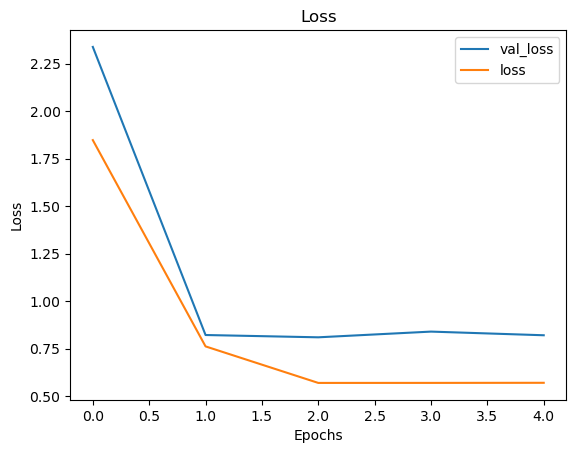

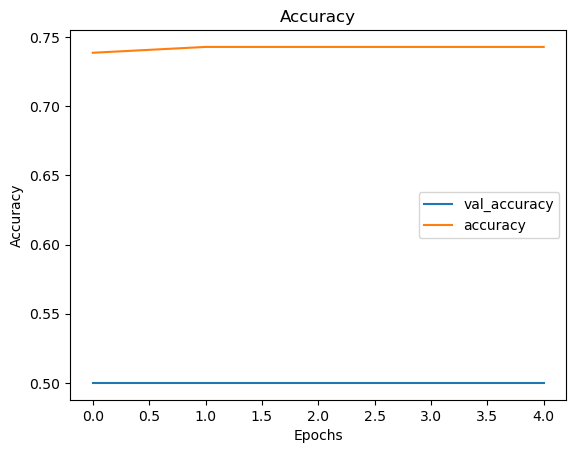

In [22]:
# Creating function to plot loss and accuracy curves

def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

# Viewing results 
visualize_training_results(results_1)

We can see by the graph that after the first Epoch, our loss tends to stabilize for the most part in both sets. In regards to accuracy there is no defined point/ epoch number as accuracy remains consistent. 

### Building a Bigger Model 

# Initial baseline model

model_2 = Sequential()
model_2.add(Dense(64, activation='tanh', input_shape=(67500,)))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))

# Compiling model with following parameters
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Inspecting model summary
model_2.summary()

# Fitting the model to the training data
results_2 = model_2.fit(train_img, train_y, 
                        epochs=5, 
                        batch_size=64, 
                        validation_data=(val_img, val_y))

# Training Results 
results2_train = model_2.evaluate(train_img, train_y)

# Test Results 

results2_test = model_2.evaluate(test_img, test_y)

print('Train Results:', results2_train)
print('Test Results:', results2_test)

# Viewing results 
visualize_training_results(results_2)

In [23]:
# Second model with additional layer

model_2 = Sequential()
model_2.add(Dense(64, activation='tanh', input_shape=(67500,)))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))

# Compiling model 
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Inspecting model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                4320064   
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,322,177
Trainable params: 4,322,177
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Fitting the model to the training data
results_2 = model_2.fit(train_img, train_y, 
                        epochs=5, 
                        batch_size=64, 
                        validation_data=(val_img, val_y))

Epoch 1/5
82/82 [==============================] - 12s 127ms/step - loss: 0.6586 - accuracy: 0.7373 - val_loss: 0.8098 - val_accuracy: 0.5000
Epoch 2/5
82/82 [==============================] - 10s 128ms/step - loss: 0.5705 - accuracy: 0.7429 - val_loss: 0.8314 - val_accuracy: 0.5000
Epoch 3/5
82/82 [==============================] - 10s 127ms/step - loss: 0.5721 - accuracy: 0.7429 - val_loss: 0.8034 - val_accuracy: 0.5000
Epoch 4/5
82/82 [==============================] - 11s 130ms/step - loss: 0.5725 - accuracy: 0.7429 - val_loss: 0.8202 - val_accuracy: 0.5000
Epoch 5/5
82/82 [==============================] - 12s 143ms/step - loss: 0.5713 - accuracy: 0.7429 - val_loss: 0.8530 - val_accuracy: 0.5000


In [26]:
# Training Results 
results2_train = model_2.evaluate(train_img, train_y)

# Test Results 
results2_test = model_2.evaluate(test_img, test_y)

print('Train Results:', results2_train)
print('Test Results:', results2_test)

20/20 [==============================] - 1s 25ms/step - loss: 0.7078 - accuracy: 0.6250
Train Results: [0.5709330439567566, 0.7429064512252808]
Test Results: [0.7078292965888977, 0.625]


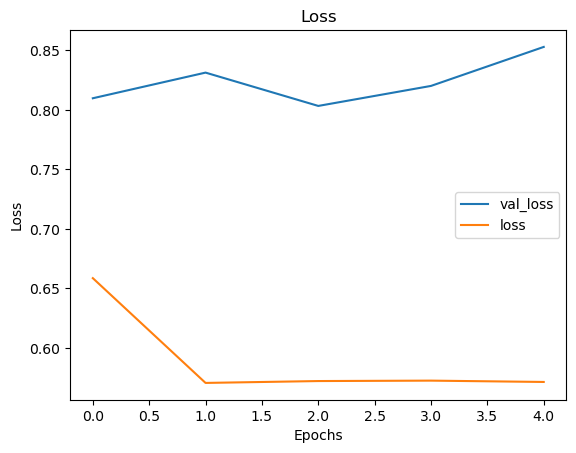

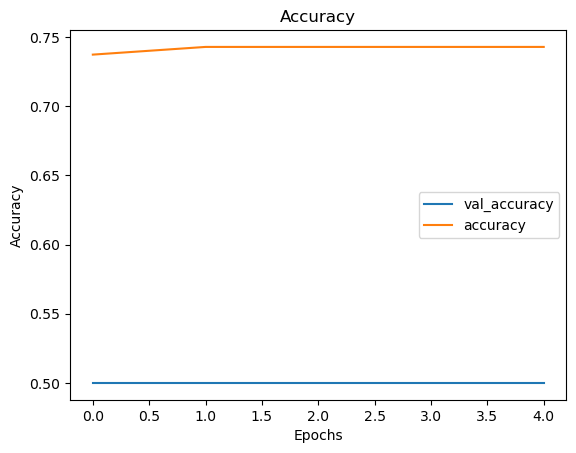

In [27]:
# Viewing results 
visualize_training_results(results_2)

With the second mondel, there was no real difference in accuracy performance or loss. 

### Building Third Model 

This model will incorporate a little additional tuning by changing the activation function. 

In [28]:
# Third model

model_3 = Sequential()
model_3.add(Dense(64, activation='relu', input_shape=(67500,)))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

# Compiling model with following parameters
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [29]:
# Inspecting model summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                4320064   
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,322,177
Trainable params: 4,322,177
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Fitting the model to the training data
results_3 = model_3.fit(train_img, train_y, 
                        epochs=5, 
                        batch_size=64, 
                        validation_data=(val_img, val_y))


Epoch 1/5
82/82 [==============================] - 14s 144ms/step - loss: 0.7682 - accuracy: 0.8267 - val_loss: 0.3928 - val_accuracy: 0.7500
Epoch 2/5
82/82 [==============================] - 12s 143ms/step - loss: 0.1791 - accuracy: 0.9321 - val_loss: 0.4560 - val_accuracy: 0.8125
Epoch 3/5
82/82 [==============================] - 11s 136ms/step - loss: 0.1456 - accuracy: 0.9421 - val_loss: 0.5569 - val_accuracy: 0.7500
Epoch 4/5
82/82 [==============================] - 12s 139ms/step - loss: 0.1363 - accuracy: 0.9509 - val_loss: 0.6853 - val_accuracy: 0.6250
Epoch 5/5
82/82 [==============================] - 11s 132ms/step - loss: 0.1330 - accuracy: 0.9480 - val_loss: 0.3205 - val_accuracy: 0.9375


In [31]:
# Training Results 
results3_train = model_3.evaluate(train_img, train_y)

# Test Results 
results3_test = model_3.evaluate(test_img, test_y)

print('Train Results:', results3_train)
print('Test Results:', results3_test)


20/20 [==============================] - 0s 13ms/step - loss: 0.8153 - accuracy: 0.7532
Train Results: [0.10158567875623703, 0.9631901979446411]
Test Results: [0.8153274655342102, 0.7532051205635071]


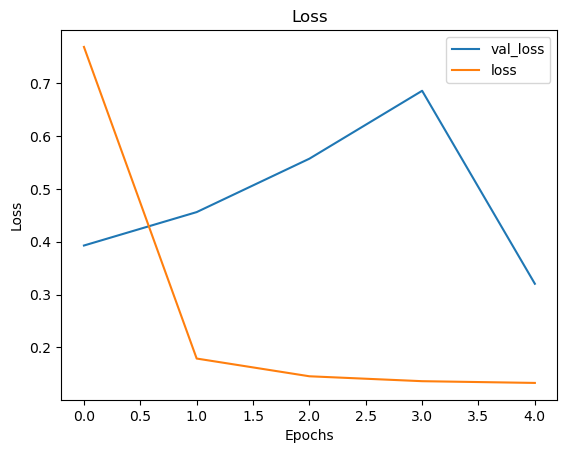

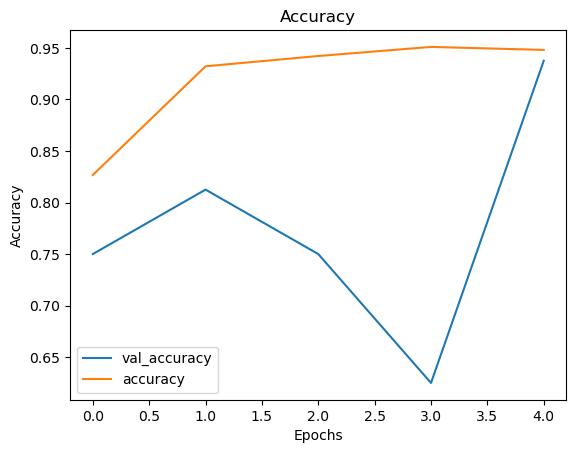

In [32]:
# Viewing results 
visualize_training_results(results_3)

Looking at the results we see that training accuracy improved up to 96.3% and test accuracy improved to 75.3%. With the training score being higher than the test score, we can see that the model is overfitting. More tuning or adjustments will be tried to see if this can be improved.

### Fourth Model with tuning to increase number of epochs

# Fourth model
# Tuning by increasing number of epochs to 20

model_4 = Sequential()
model_4.add(Dense(64, activation='relu', input_shape=(67500,)))
model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(1, activation='sigmoid'))

# Compiling model with following parameters
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Inspecting model summary
model_4.summary()

# Fitting the model to the training data
results_4 = model_4.fit(train_img, train_y, 
                        epochs=20, 
                        batch_size=64, 
                        validation_data=(val_img, val_y))

# Training Results 
results4_train = model_4.evaluate(train_img, train_y)

# Test Results 
results4_test = model_4.evaluate(test_img, test_y)

print('Train Results:', results4_train)
print('Test Results:', results4_test)

# Viewing results 
visualize_training_results(results_4)

In [37]:
# Fourth model
# Tuning by increasing number of epochs to 10

model_4 = Sequential()
model_4.add(Dense(64, activation='relu', input_shape=(67500,)))
model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(1, activation='sigmoid'))

# Compiling model with following parameters
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Inspecting model summary
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                4320064   
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,322,177
Trainable params: 4,322,177
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Fitting the model to the training data
results_4 = model_4.fit(train_img, train_y, 
                        epochs=10, 
                        batch_size=64, 
                        validation_data=(val_img, val_y))

Epoch 1/10
82/82 [==============================] - 8s 91ms/step - loss: 1.0247 - accuracy: 0.8079 - val_loss: 3.5292 - val_accuracy: 0.5000
Epoch 2/10
82/82 [==============================] - 6s 75ms/step - loss: 0.4396 - accuracy: 0.8852 - val_loss: 0.2682 - val_accuracy: 0.9375
Epoch 3/10
82/82 [==============================] - 6s 77ms/step - loss: 0.1891 - accuracy: 0.9411 - val_loss: 0.2578 - val_accuracy: 0.9375
Epoch 4/10
82/82 [==============================] - 6s 77ms/step - loss: 0.1439 - accuracy: 0.9490 - val_loss: 2.9120 - val_accuracy: 0.5625
Epoch 5/10
82/82 [==============================] - 6s 75ms/step - loss: 0.1749 - accuracy: 0.9408 - val_loss: 0.2382 - val_accuracy: 0.9375
Epoch 6/10
82/82 [==============================] - 7s 79ms/step - loss: 0.1834 - accuracy: 0.9316 - val_loss: 1.3142 - val_accuracy: 0.6250
Epoch 7/10
82/82 [==============================] - 6s 76ms/step - loss: 0.1311 - accuracy: 0.9555 - val_loss: 0.6892 - val_accuracy: 0.6875
Epoch 8/10
82

In [39]:
# Training Results 
results4_train = model_4.evaluate(train_img, train_y)

# Test Results 
results4_test = model_4.evaluate(test_img, test_y)

print('Train Results:', results4_train)
print('Test Results:', results4_test)

20/20 [==============================] - 0s 13ms/step - loss: 1.5558 - accuracy: 0.7099
Train Results: [0.10744699835777283, 0.9622315764427185]
Test Results: [1.5558297634124756, 0.7099359035491943]


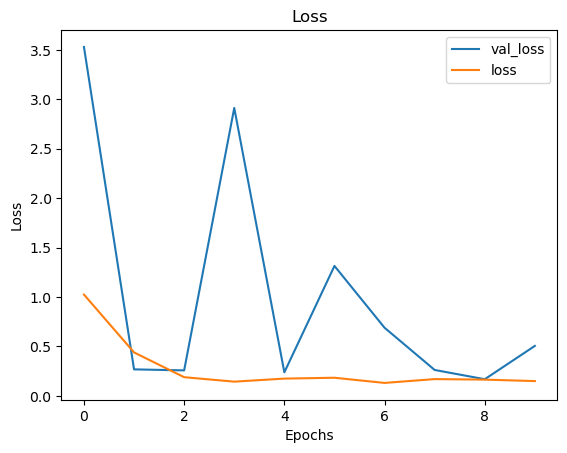

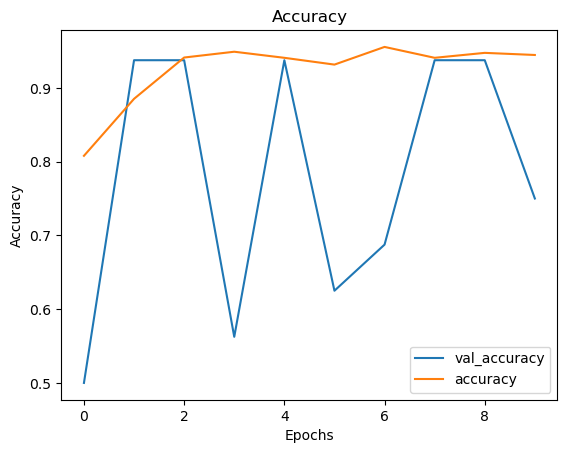

In [40]:
# Viewing results 
visualize_training_results(results_4)

Looking at the results we see that training accuracy remained similar with a value of 96.2%, however test accuracy decreased to 71.0%. The model is still overfitting. May reduce model complexity in next iteration by reducing number of neurons in each layer.

### Fifth Model with reduced neurons in each layer 

In [41]:
# Fifth model
# Tuning by decreasing neurons to decrease model complexity but increasing epochs to 20

model_5 = Sequential()
model_5.add(Dense(32, activation='relu', input_shape=(67500,)))
model_5.add(Dense(16, activation='relu'))
model_5.add(Dense(1, activation='sigmoid'))

# Compiling model with following parameters
model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Inspecting model summary
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                2160032   
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,160,577
Trainable params: 2,160,577
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Fitting the model to the training data
results_5 = model_5.fit(train_img, train_y, 
                        epochs=20, 
                        batch_size=64, 
                        validation_data=(val_img, val_y))

Epoch 1/20
82/82 [==============================] - 4s 43ms/step - loss: 0.1397 - accuracy: 0.9572 - val_loss: 0.3893 - val_accuracy: 0.8750
Epoch 2/20
82/82 [==============================] - 4s 43ms/step - loss: 0.1620 - accuracy: 0.9465 - val_loss: 0.8855 - val_accuracy: 0.6875
Epoch 3/20
82/82 [==============================] - 3s 41ms/step - loss: 0.1376 - accuracy: 0.9559 - val_loss: 1.1324 - val_accuracy: 0.6250
Epoch 4/20
82/82 [==============================] - 3s 42ms/step - loss: 0.3469 - accuracy: 0.9224 - val_loss: 0.8420 - val_accuracy: 0.8750
Epoch 5/20
82/82 [==============================] - 3s 42ms/step - loss: 0.1390 - accuracy: 0.9617 - val_loss: 0.2208 - val_accuracy: 0.9375
Epoch 6/20
82/82 [==============================] - 4s 43ms/step - loss: 0.1165 - accuracy: 0.9641 - val_loss: 0.1210 - val_accuracy: 1.0000
Epoch 7/20
82/82 [==============================] - 4s 43ms/step - loss: 0.1354 - accuracy: 0.9594 - val_loss: 1.0403 - val_accuracy: 0.6250
Epoch 8/20
82

In [46]:
# Training Results 
results5_train = model_5.evaluate(train_img, train_y)

# Test Results 
results5_test = model_5.evaluate(test_img, test_y)

print('Train Results:', results5_train)
print('Test Results:', results5_test)


20/20 [==============================] - 0s 7ms/step - loss: 1.2970 - accuracy: 0.7965
Train Results: [0.10945562273263931, 0.96875]
Test Results: [1.2970441579818726, 0.7964743375778198]


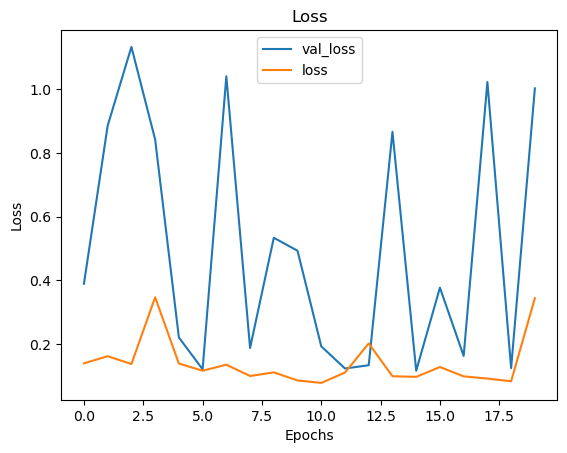

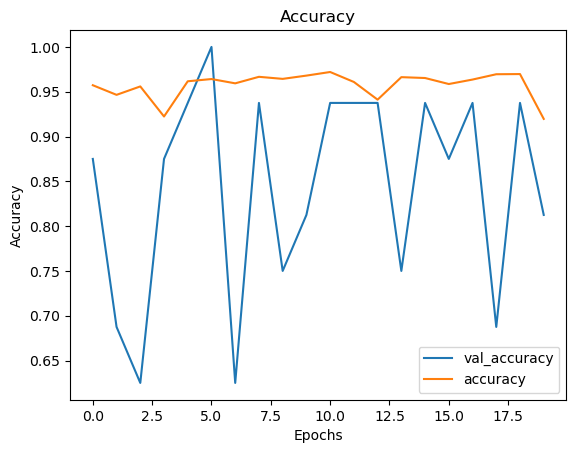

In [47]:
# Viewing results 
visualize_training_results(results_5)

With the fifth model, epochs were increased to 20 and neurons in the first two layers were decreased by half. Model performance improved and currently this has been the best performing model. 
- Train Accuracy: 96.9%
- Test Accuracy: 79.6%

Accuracy improved for both training and test sets, however model still is showing signs of overfitting. 

# Utilizing Data Augmentation to increase number of samples for smaller sets

datagen = ImageDataGenerator(rotation_range=20, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True)

# Create a generator for augmented data
augmented_train_data = datagen.flow(train_images, train_labels, batch_size=64)

# Use augmented data for training
model.fit(augmented_train_data, epochs=5, validation_data=(val_images, val_labels))


# Fitting the model 

#class_weights = {0: 1, 1: 5}  # Adjust weights based on the class distribution

results_1 = model_1.fit(train_images_reshaped, train_labels_final, 
                        epochs=5, 
                        batch_size=64, 
                        validation_data=(val_images_reshaped, val_labels_final))

  #                      class_weight= class_weights)

# Building CNN Model

In [ ]:
# Datasets 
#train_images, train_labels = next(train_generator)
#test_images, test_labels = next(test_generator)
#val_images, val_labels = next(val_generator)

In [53]:
# Build a baseline fully connected model

from keras import models
from keras import layers
np.random.seed(123)
connected_baseline_model = models.Sequential()
connected_baseline_model.add(layers.Dense(20, activation='relu', input_shape=(67500,)))
connected_baseline_model.add(layers.Dense(7, activation='relu'))
connected_baseline_model.add(layers.Dense(5, activation='relu'))
connected_baseline_model.add(layers.Dense(1, activation='sigmoid'))

In [54]:
connected_baseline_model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_connected = connected_baseline_model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/50
163/163 [==============================] - 5s 25ms/step - loss: 0.5494 - accuracy: 0.7350 - val_loss: 0.9185 - val_accuracy: 0.5000
Epoch 2/50
163/163 [==============================] - 5s 28ms/step - loss: 0.3922 - accuracy: 0.7949 - val_loss: 0.5993 - val_accuracy: 0.8125
Epoch 3/50
163/163 [==============================] - 4s 25ms/step - loss: 0.3931 - accuracy: 0.7820 - val_loss: 0.5565 - val_accuracy: 0.8125
Epoch 4/50
163/163 [==============================] - 3s 19ms/step - loss: 0.2882 - accuracy: 0.9126 - val_loss: 0.4828 - val_accuracy: 0.9375
Epoch 5/50
163/163 [==============================] - 3s 18ms/step - loss: 0.2698 - accuracy: 0.9110 - val_loss: 0.5796 - val_accuracy: 0.8125
Epoch 6/50
163/163 [==============================] - 3s 21ms/step - loss: 0.2476 - accuracy: 0.9256 - val_loss: 0.5100 - val_accuracy: 0.8125
Epoch 7/50
163/163 [==============================] - 3s 20ms/step - loss: 0.2447 - accuracy: 0.9214 - val_loss: 0.4647 - val_accuracy: 0.8125

In [55]:
# Evaluating the model 
connected_results_train = connected_baseline_model.evaluate(train_img, train_y)

connected_results_test = connected_baseline_model.evaluate(test_img, test_y)

20/20 [==============================] - 1s 29ms/step - loss: 1.1048 - accuracy: 0.7372


In [52]:
# Reviewing train and test results 
print("Train Accuracy: ", connected_results_train)
print("Test Accuracy: ", connected_results_test)

Train Accuracy:  [0.09616447240114212, 0.9674080014228821]
Test Accuracy:  [1.266461730003357, 0.7227563858032227]


With the baseline densely connected network model, we obtained a training accuracy of 97% and a test set accuracy of 72.7%. With a higher training accuracy, we see that the model is overfitting. 

## Model 2: CNN Model

In [56]:
# Building the CNN

cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150 ,150,  3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Conv2D(32, (4, 4), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

cnn_model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [57]:
# Fitting the model 
cnn_history = cnn_model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Epoch 1/30
163/163 [==============================] - 257s 2s/step - loss: 0.5414 - acc: 0.7464 - val_loss: 0.6863 - val_acc: 0.6250
Epoch 2/30
163/163 [==============================] - 206s 1s/step - loss: 0.4057 - acc: 0.8240 - val_loss: 0.7086 - val_acc: 0.6250
Epoch 3/30
163/163 [==============================] - 205s 1s/step - loss: 0.2647 - acc: 0.8984 - val_loss: 0.7478 - val_acc: 0.6250
Epoch 4/30
163/163 [==============================] - 200s 1s/step - loss: 0.2167 - acc: 0.9143 - val_loss: 0.7534 - val_acc: 0.6250
Epoch 5/30
163/163 [==============================] - 199s 1s/step - loss: 0.1789 - acc: 0.9281 - val_loss: 0.4820 - val_acc: 0.7500
Epoch 6/30
163/163 [==============================] - 202s 1s/step - loss: 0.1574 - acc: 0.9402 - val_loss: 1.2177 - val_acc: 0.5625
Epoch 7/30
163/163 [==============================] - 199s 1s/step - loss: 0.1484 - acc: 0.9411 - val_loss: 0.4768 - val_acc: 0.7500
Epoch 8/30
163/163 [==============================] - 202s 1s/step - 

In [59]:
train_img.shape

(5216, 67500)

In [60]:
train_images.shape

(5216, 150, 150, 3)

In [61]:
# Evaluating the model 
# Used train_images and test_images instead of train_img and test_img 
# because CNN expects 4D input
cnn_results_train = cnn_model.evaluate(train_images, train_y)

cnn_results_test = cnn_model.evaluate(test_images, test_y)

20/20 [==============================] - 4s 177ms/step - loss: 1.2700 - acc: 0.7340


In [62]:
# Reviewing train and test results 
print("Train Accuracy: ", cnn_results_train)
print("Test Accuracy: ", cnn_results_test)

Train Accuracy:  [0.048224128782749176, 0.9825536608695984]
Test Accuracy:  [1.2699623107910156, 0.7339743375778198]


The CNN model performance slightly improved over the previous connected model with a training accuracy of 98.3 % and a test accuracy of 73.3%. The model does still show signs of overfitting with the training performance being much higher than the test performance 

In [ ]:
# Adding additional layers 

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))